<a href="https://colab.research.google.com/github/youngmook/cheminfo-python/blob/main/cheminfo_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RDKit (Cheminformatics tool) 설치

In [5]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 49.2 MB/s eta 0:00:00


## RDKit 불러오기


In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

## MDL Mol 파일을 읽고 쓰기를 해보자

벤젠 분자를 만들어 보자 (SMILES 코드를 이용하자)

In [ ]:
theMol = Chem.MolFromSmiles('CCCCCCOCCC')
theMol

MDL Molfile 문자열 만들기

In [ ]:
theMolBlock = Chem.MolToMolBlock(theMol)
print(theMolBlock)

분자 이름 변경하기

In [ ]:
theMol.SetProp('_Name','1-Propoxyhexane')
print(Chem.MolToMolBlock(theMol))

분자를 MDL Mol파일로 저장하기


In [ ]:
theMolName = '1-Propoxyhexane.mol'
print(Chem.MolToMolBlock(theMol),file=open(theMolName, 'w+'))

MDL Mol 파일 불러오기

In [ ]:
theAnotherMol = Chem.MolFromMolFile(theMolName)
theAnotherMol

잘못된 분자구조를 읽어오려고 하면, 오류 메세지와 함께 Mol 객체는 None을 나타냄

In [ ]:
theInvalidMolecule1 = Chem.MolFromSmiles('CO(C)C')
theInvalidMolecule1 is None

잘못된 분자구조를 읽어오려고 하면, 오류 메세지와 함께 Mol 객체는 None을 나타냄 (Kekulize 오류)

In [ ]:
theInvalidMolecule1 = Chem.MolFromSmiles('c1cc1')
theInvalidMolecule1 is None

## RDKit Mol 객체 다루기!!!
분자의 원자 개수 확인

In [ ]:
theNumOfAtoms = theMol.GetNumAtoms()
theNumOfAtoms

분자의 Bond 개수 확인

In [ ]:
theNumOfBonds = theMol.GetNumBonds()
theNumOfBonds

분자에 H원자 붙이기

In [ ]:
theMolWithHAtoms = Chem.AddHs(theMol)
theMolWithHAtoms

분자구조의 위치를 3차원 좌표값으로 만들기

In [ ]:
AllChem.EmbedMolecule(theMolWithHAtoms)  
print(Chem.MolToMolBlock(theMolWithHAtoms))
theMolWithHAtoms

In [ ]:
!pip install py3Dmol

In [ ]:
import py3Dmol

def show3DMol(theMol, style='stick'):
    mblock = Chem.MolToMolBlock(theMol)

    view = py3Dmol.view(width=400, height=400)
    view.addModel(mblock, 'mol')
    view.setStyle({style:{}})
    view.zoomTo()
    view.show()

def show3DMolWithOptimization(theMol, style='stick'):
    mol = Chem.AddHs(theMol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    mblock = Chem.MolToMolBlock(mol)

    view = py3Dmol.view(width=400, height=400)
    view.addModel(mblock, 'mol')
    view.setStyle({style:{}})
    view.zoomTo()
    view.show()
    


In [ ]:
show3DMol(theMolWithHAtoms)  

In [ ]:
show3DMolWithOptimization(theMolWithHAtoms)  

분자구조를 2차원으로 만들기

In [ ]:
AllChem.Compute2DCoords(theMolWithHAtoms)
print(Chem.MolToMolBlock(theMolWithHAtoms))
theMolWithHAtoms

H원자 지우기

In [ ]:
theMol2 = Chem.RemoveHs(theMolWithHAtoms)
print(Chem.MolToMolBlock(theMol2))
theMol2

## Atom과 Bond 다루기

개별 Atom 객체 가져오기

In [ ]:
theFirstAtomOfMol = theMol.GetAtomWithIdx(0)
theFirstAtomOfMol

In [ ]:
theFirstAtomOfMol.GetAtomicNum()

In [ ]:
theFirstAtomOfMol.GetMass()

In [ ]:
theFirstAtomOfMol.GetSymbol()

In [ ]:
theNeighbors = theFirstAtomOfMol.GetNeighbors()
theNeighbors

원자번호 및 원소기호 출력

In [ ]:
#GetAtoms()

for index, ithAtom in enumerate(theMolWithHAtoms.GetAtoms()):
  print(str(index+1).zfill(2), '원자번호: {0}, 원소기호: {1}'.format(ithAtom.GetAtomicNum(), ithAtom.GetSymbol()))


개별 Bond 객체 가져오기

In [ ]:
theFirstBond = theMol.GetBondWithIdx(0)
theFirstBond

In [ ]:
theFirstBond.GetBeginAtomIdx()

In [ ]:
theFirstBond.GetEndAtomIdx()

In [ ]:
theFirstBond.GetBondType()

Bond 정보 출력

In [ ]:
#GetBonds()

for index, ithBond in enumerate(theMolWithHAtoms.GetBonds()):
  print(str(index+1).zfill(2), '\t시작: {0}, 끝: {1}, Type: {2}'.format( 
      str(ithBond.GetBeginAtomIdx()).zfill(2), 
      str(ithBond.GetEndAtomIdx()).zfill(2), 
      ithBond.GetBondType()))


## SMILES 코드 다루기
*   Chiral 표현



In [ ]:
theChiralMol = Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
print(Chem.MolToMolBlock(theChiralMol))
theChiralMol

In [ ]:
show3DMol(theChiralMol)

In [ ]:
show3DMolWithOptimization(theChiralMol)

Chiral 제거

In [ ]:
theRemovedChiralMolSmiles = Chem.MolToSmiles(theChiralMol,isomericSmiles=False)
theRemovedChiralMol = Chem.MolFromSmiles(theRemovedChiralMolSmiles)
print(Chem.MolToMolBlock(theRemovedChiralMol))
print(theRemovedChiralMolSmiles)
theRemovedChiralMol

* 기본 SMILES코드는 Canonical SMILES를 제공함

In [ ]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1')))
Chem.MolFromSmiles('C1=CC=CN=C1')

In [ ]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1')))
Chem.MolFromSmiles('c1cccnc1')

In [ ]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1')))
Chem.MolFromSmiles('n1ccccc1')

## MDL SDF 파일 읽기 (Reading sets of molecules)

MDL SD 파일은 "Mol 파일 묶음 + 분자 속성"을 가진 파일입니다.

In [ ]:
theSDMolSupplier = Chem.SDMolSupplier('in-stock+for-sale.sdf')

theZincMolList = []

for ithMol in theSDMolSupplier :
  theZincMolList.append(ithMol)
  pass

theZincMolList[0:10]

In [ ]:
print(theZincMolList[0].GetProp("zinc_id"))

In [ ]:
print(Chem.MolToMolBlock(theZincMolList[0]))

In [ ]:
theZincMolList[0]

In [ ]:
show3DMol(theZincMolList[0])

In [ ]:
show3DMolWithOptimization(theZincMolList[0])

## 분자 그림 파일 만들기

In [ ]:
from rdkit.Chem import Draw


In [ ]:
Draw.MolToFile(theZincMolList[0], 'zinc-001.png')
theZincMolList[0]

2D 구조 최적화 후 그림 저장

In [ ]:
import copy
theFirstZincMol = copy.deepcopy(theZincMolList[0])
AllChem.Compute2DCoords(theFirstZincMol)


In [ ]:
Draw.MolToFile(theFirstZincMol, 'zinc-001-2D.png')
theFirstZincMol

여러 분자를 Grid 형태로 저장



In [ ]:
theGridImage = Draw.MolsToGridImage(theZincMolList[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("zinc_id") for x in theZincMolList[:8]], returnPNG=False)    
theGridImage.save('zinc-grid-001-008.png')
theGridImage

In [ ]:
for ithMol in theZincMolList:
  AllChem.Compute2DCoords(ithMol)
  pass

theGridImage = Draw.MolsToGridImage(theZincMolList[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("zinc_id") for x in theZincMolList[:8]], returnPNG=False)    
theGridImage.save('zinc-grid-001-008-2D.png')
theGridImage

Sub structure를 가진 화합물 찾아 그림으로 저장

In [ ]:
theCommonCoreMol = Chem.MolFromSmiles('Nc1ccccc1')
theCommonCoreMol

In [ ]:
#theSubZincMolList = [x for x in theZincMolList if x.HasSubstructMatch(theCommonCoreMol)]

theSubMatchedMolList = []
for ithMol in theZincMolList:
  if (ithMol.HasSubstructMatch(theCommonCoreMol)):
    theSubMatchedMolList.append(ithMol)
    pass
  pass

print('# of total molecule list : ' + str(len(theZincMolList)))
print('# of matched molecules : ' + str(len(theSubMatchedMolList)))


In [ ]:
AllChem.Compute2DCoords(theCommonCoreMol)

for ithMatchedMol in theSubMatchedMolList:
  _ = AllChem.GenerateDepictionMatching2DStructure(ithMatchedMol,theCommonCoreMol)    

In [ ]:
theMatchedGridImage = Draw.MolsToGridImage(theSubMatchedMolList[:12],molsPerRow=4,subImgSize=(300,300),legends=[x.GetProp("zinc_id") for x in theSubMatchedMolList], returnPNG=False)    
theMatchedGridImage.save('zinc-matched-grid.png') 
theMatchedGridImage

## Substructure 검색

In [ ]:
theMolecule = Chem.MolFromSmiles('c1ccccc1O')
theMolecule



In [ ]:
thePattern = Chem.MolFromSmarts('ccO')
thePattern

In [ ]:
theMolecule.HasSubstructMatch(thePattern)

In [ ]:
theMolecule.GetSubstructMatch(thePattern)

In [ ]:
theMolecule.GetSubstructMatches(thePattern)

In [ ]:
theMatchedMolList = []
for ithZincMol in theZincMolList:
  if ithZincMol.HasSubstructMatch(thePattern):
    theMatchedMolList.append(ithZincMol)

print(len(theMatchedMolList))

In [ ]:
for ithMol in theMatchedMolList:
  AllChem.Compute2DCoords(ithMol)
  pass

theGridImage = Draw.MolsToGridImage(theMatchedMolList,molsPerRow=6,subImgSize=(200,200),legends=[x.GetProp("zinc_id") for x in theMatchedMolList], returnPNG=False)    
theGridImage.save('zinc-substr-matched-grid-2D.png')
theGridImage

## Chemical Transformations

Substructure-based Transformations

* Deleting substructure

In [ ]:
theMol = Chem.MolFromSmiles('CC(=O)O')
theMol

In [ ]:
thePattern = Chem.MolFromSmarts('C(=O)[OH]')
thePattern

In [ ]:
theRemovedMol = AllChem.DeleteSubstructs(theMol,thePattern)
theRemovedMol

* Replacing substructure

In [ ]:
theReplaceMol = Chem.MolFromSmiles('OC')
theReplaceMol

In [ ]:
thePattern = Chem.MolFromSmarts('[$(NC(=O))]')
thePattern

In [ ]:
theMol = Chem.MolFromSmiles('CC(=O)N')
theMol

In [ ]:
AllChem.ReplaceSubstructs(theMol,thePattern,theReplaceMol)[0]


## Fingerprinting and Molecular Similarity


In [ ]:
from rdkit import DataStructs

첫번째 분자와 나머지 분자의 유사도 계산

In [ ]:
theFingerprintList = [Chem.RDKFingerprint(x) for x in theZincMolList]
for idx, ithFingerprint in enumerate(theFingerprintList):
  if idx == 0 : continue
  ithSimilarity = DataStructs.FingerprintSimilarity(theFingerprintList[0], theFingerprintList[idx])
  print(idx, ithSimilarity)

Fingerprint 이미지 만들기

In [ ]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
bi[872]

In [ ]:
mfp2_svg = Draw.DrawMorganBit(mol, 872, bi, useSVG=True)
mfp2_svg

In [ ]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
rdkbi[1553]

In [ ]:
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)
rdk_svg

In [3]:
import requests
theLogSDataFileUrl = 'https://raw.githubusercontent.com/youngmook/cheminfo-python/main/logS-data.sdf'

theResponse = requests.get(theLogSDataFileUrl, allow_redirects=True)
with open('logS-data.sdf', 'wb') as theWriter:
  theWriter.write(theResponse.content)



In [7]:
theSDMolSupplier = Chem.SDMolSupplier('logS-data.sdf')

theMolList = []

for ithMol in theSDMolSupplier :
  theMolList.append(ithMol)
  pass

theMolList[0:10]

In [8]:
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (
    Dense,
    Dropout,
)


In [9]:
def molToFingerprintList(mol):
  return np.append(Fingerprinter.FingerprintMol(mol)[0],Descriptors.MolWt(mol))

In [10]:
X = []
y = []
for ithMol in theMolList:
  X.append(molToFingerprintList(ithMol))
  y.append(float(ithMol.GetProp('logS')))
X = np.array(X)
y = np.array(y)
X

array([[  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 665.733],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 589.64 ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 528.582],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 206.266],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 218.321],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 141.086]])

In [11]:
theStandardScaler = StandardScaler()
X= theStandardScaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.99449515],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.36520251],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.08054434],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.86357368],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.62097486],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.04418619]])

In [13]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1, activation='linear'))

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               41472     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dense_4 (Dense)             (None, 1024)              263168    
                                                                 
 dense_5 (Dense)             (None, 512)               5

In [15]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=True))


In [ ]:
#history = model.fit(X_train, y_train, nb_epoch=500, batch_size=32)
history = model.fit(
    X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test)
)

11/11 [==============================] - 0s 6ms/step


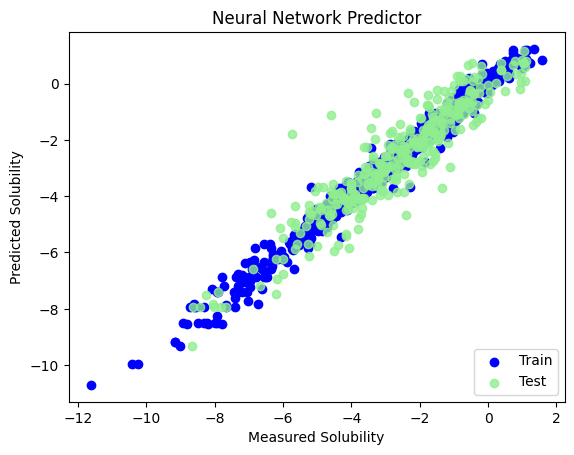

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_train,model.predict(X_train), label = 'Train', c='blue')
plt.title('Neural Network Predictor')
plt.xlabel('Measured Solubility')
plt.ylabel('Predicted Solubility')
plt.scatter(y_test,model.predict(X_test),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
plt.show()